In [ ]:
#Imorting all libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC  
from sklearn.model_selection import train_test_split  
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer
import statistics

In [ ]:
#read and shuffle data
df = pd.read_csv("/content/Dataset-6.csv")
df = df.sample(frac = 1)

In [ ]:
df.columns

Index(['Eosinophils_(normalized_–_counts/µL)',
       'Monocytes_(normalized_–_counts/µL)',
       'Platelets_(normalized_–_counts(×10^3)/µL)',
       'Hematocrit_(normalized_–_percentage)',
       'Erythrocytes_(normalized_–_counts(×10^6)/µL)',
       'Lymphocytes_(normalized_–_counts/µL)',
       'Neutrophils_(normalized_–_counts/µL)',
       'Basophils_(normalized_–_counts/µL)',
       'Serum_Albumin_(normalized_–_g/dL)',
       'Mature_Neutrophils_(normalized_–_counts/µL)',
       'Total_Bilirubin_(normalized_–_mg/dL)',
       'Serum_Ca_(normalized_–_mmol/L)',
       'Lactate_Dehydrogenase_(normalized_–_U/L)',
       'Serum_Ferritin_(normalized_–_ng/mL)',
       'Serum_Phosphorus_(normalized_–_mg/dL)', 'Gamma-GT_(normalized_–_U/L)',
       'Serum_Magnesium_(normalized_–_mEq/L)',
       'pO2_–_Arterial_(normalized_–_mm_Hg)', 'AST_(normalized_–_U/L)',
       'ALT_(normalized_–_U/L)', 'SARS-CoV-2'],
      dtype='object')

In [ ]:
df

,Eosinophils_(normalized_–_counts/µL),Monocytes_(normalized_–_counts/µL),Platelets_(normalized_–_counts(×10^3)/µL),Hematocrit_(normalized_–_percentage),Erythrocytes_(normalized_–_counts(×10^6)/µL),Lymphocytes_(normalized_–_counts/µL),Neutrophils_(normalized_–_counts/µL),Basophils_(normalized_–_counts/µL),Serum_Albumin_(normalized_–_g/dL),Mature_Neutrophils_(normalized_–_counts/µL),Total_Bilirubin_(normalized_–_mg/dL),Serum_Ca_(normalized_–_mmol/L),Lactate_Dehydrogenase_(normalized_–_U/L),Serum_Ferritin_(normalized_–_ng/mL),Serum_Phosphorus_(normalized_–_mg/dL),Gamma-GT_(normalized_–_U/L),Serum_Magnesium_(normalized_–_mEq/L),pO2_–_Arterial_(normalized_–_mm_Hg),AST_(normalized_–_U/L),ALT_(normalized_–_U/L),SARS-CoV-2
3449,-2.444444,0.433333,-2.120000,-6.640000,-6.800000,-2.9020,2.150476,-1.64,NaN,NaN,NaN,-2.941176,NaN,NaN,-2.0,NaN,0.4,-1.52,NaN,NaN,1
6189,1.928889,2.033333,-0.653333,0.181818,0.657143,0.1380,4.825397,0.56,NaN,NaN,NaN,NaN,0.666667,NaN,NaN,NaN,-0.4,NaN,NaN,-1.400000,0
2343,0.693333,-1.806667,-0.786667,0.080000,0.000000,-0.5940,-0.744127,-1.28,1.058824,NaN,-1.272727,NaN,NaN,-1.475591,NaN,-1.741935,NaN,NaN,NaN,-2.480000,0
2727,1.191111,1.320000,-0.866667,-0.436364,-0.171429,1.8200,-1.174603,-0.32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.926829,1
3394,-2.097778,-1.426667,-1.866667,-2.360000,-2.327273,-0.0580,0.356190,-1.08,NaN,NaN,NaN,NaN,-0.278481,NaN,NaN,NaN,NaN,NaN,NaN,-1.200000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5948,-2.444444,-0.213333,-1.653333,-1.527273,-1.142857,-3.2320,NaN,-2.00,NaN,2.086349,-0.909091,-0.352941,20.444444,20.507463,-0.6,5.471698,2.0,29.20,NaN,1.700000,1
4424,-1.720000,3.950000,-0.066667,-2.571429,-0.666667,-1.7296,6.130968,-1.30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,-1.024390,0
3433,-0.480000,1.946667,1.640000,-0.181818,0.228571,0.8880,-0.631746,0.36,NaN,NaN,NaN,-0.117647,3.422222,3.057569,NaN,NaN,1.0,NaN,NaN,NaN,1
2572,-0.844444,0.386667,-0.773333,-0.800000,0.000000,-0.2760,-0.516190,-1.48,NaN,NaN,NaN,NaN,0.666667,NaN,NaN,NaN,NaN,NaN,NaN,0.700000,0


In [ ]:
df['SARS-CoV-2'].value_counts()

0    4967
1    2182
Name: SARS-CoV-2, dtype: int64

In [ ]:
df.shape

(7149, 21)

In [ ]:
#dropping id column as it is not a valid attribute to train model
#df = df.drop(['Unnamed: 0'], axis = 1)
#df = df.drop(['New_ID'], axis = 1)

In [ ]:
df

,Eosinophils_(normalized_–_counts/µL),Monocytes_(normalized_–_counts/µL),Platelets_(normalized_–_counts(×10^3)/µL),Hematocrit_(normalized_–_percentage),Erythrocytes_(normalized_–_counts(×10^6)/µL),Lymphocytes_(normalized_–_counts/µL),Neutrophils_(normalized_–_counts/µL),Basophils_(normalized_–_counts/µL),Serum_Albumin_(normalized_–_g/dL),Mature_Neutrophils_(normalized_–_counts/µL),Total_Bilirubin_(normalized_–_mg/dL),Serum_Ca_(normalized_–_mmol/L),Lactate_Dehydrogenase_(normalized_–_U/L),Serum_Ferritin_(normalized_–_ng/mL),Serum_Phosphorus_(normalized_–_mg/dL),Gamma-GT_(normalized_–_U/L),Serum_Magnesium_(normalized_–_mEq/L),pO2_–_Arterial_(normalized_–_mm_Hg),AST_(normalized_–_U/L),ALT_(normalized_–_U/L),SARS-CoV-2
3449,-2.444444,0.433333,-2.120000,-6.640000,-6.800000,-2.9020,2.150476,-1.64,NaN,NaN,NaN,-2.941176,NaN,NaN,-2.0,NaN,0.4,-1.52,NaN,NaN,1
6189,1.928889,2.033333,-0.653333,0.181818,0.657143,0.1380,4.825397,0.56,NaN,NaN,NaN,NaN,0.666667,NaN,NaN,NaN,-0.4,NaN,NaN,-1.400000,0
2343,0.693333,-1.806667,-0.786667,0.080000,0.000000,-0.5940,-0.744127,-1.28,1.058824,NaN,-1.272727,NaN,NaN,-1.475591,NaN,-1.741935,NaN,NaN,NaN,-2.480000,0
2727,1.191111,1.320000,-0.866667,-0.436364,-0.171429,1.8200,-1.174603,-0.32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.926829,1
3394,-2.097778,-1.426667,-1.866667,-2.360000,-2.327273,-0.0580,0.356190,-1.08,NaN,NaN,NaN,NaN,-0.278481,NaN,NaN,NaN,NaN,NaN,NaN,-1.200000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5948,-2.444444,-0.213333,-1.653333,-1.527273,-1.142857,-3.2320,NaN,-2.00,NaN,2.086349,-0.909091,-0.352941,20.444444,20.507463,-0.6,5.471698,2.0,29.20,NaN,1.700000,1
4424,-1.720000,3.950000,-0.066667,-2.571429,-0.666667,-1.7296,6.130968,-1.30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,-1.024390,0
3433,-0.480000,1.946667,1.640000,-0.181818,0.228571,0.8880,-0.631746,0.36,NaN,NaN,NaN,-0.117647,3.422222,3.057569,NaN,NaN,1.0,NaN,NaN,NaN,1
2572,-0.844444,0.386667,-0.773333,-0.800000,0.000000,-0.2760,-0.516190,-1.48,NaN,NaN,NaN,NaN,0.666667,NaN,NaN,NaN,NaN,NaN,NaN,0.700000,0


In [ ]:
df.isnull().any()

Eosinophils_(normalized_–_counts/µL)             True
Monocytes_(normalized_–_counts/µL)               True
Platelets_(normalized_–_counts(×10^3)/µL)        True
Hematocrit_(normalized_–_percentage)             True
Erythrocytes_(normalized_–_counts(×10^6)/µL)     True
Lymphocytes_(normalized_–_counts/µL)             True
Neutrophils_(normalized_–_counts/µL)             True
Basophils_(normalized_–_counts/µL)               True
Serum_Albumin_(normalized_–_g/dL)                True
Mature_Neutrophils_(normalized_–_counts/µL)      True
Total_Bilirubin_(normalized_–_mg/dL)             True
Serum_Ca_(normalized_–_mmol/L)                   True
Lactate_Dehydrogenase_(normalized_–_U/L)         True
Serum_Ferritin_(normalized_–_ng/mL)              True
Serum_Phosphorus_(normalized_–_mg/dL)            True
Gamma-GT_(normalized_–_U/L)                      True
Serum_Magnesium_(normalized_–_mEq/L)             True
pO2_–_Arterial_(normalized_–_mm_Hg)              True
AST_(normalized_–_U/L)      

In [ ]:
#df = df.fillna(lambda x: x.median())

In [ ]:
data = df.to_numpy()

data.shape

(7149, 21)

In [ ]:
imp = SimpleImputer(missing_values=np.nan, strategy='median')
imp.fit(data)
#X_2 = X
SimpleImputer()
data = imp.transform(data)

data

array([[-2.44444444,  0.43333333, -2.12      , ...,  0.375     ,
        -0.08      ,  1.        ],
       [ 1.92888889,  2.03333333, -0.65333333, ...,  0.375     ,
        -1.4       ,  0.        ],
       [ 0.69333333, -1.80666667, -0.78666667, ...,  0.375     ,
        -2.48      ,  0.        ],
       ...,
       [-0.48      ,  1.94666667,  1.64      , ...,  0.375     ,
        -0.08      ,  1.        ],
       [-0.84444444,  0.38666667, -0.77333333, ...,  0.375     ,
         0.7       ,  0.        ],
       [-2.08      , -0.65333333,  0.29333333, ...,  0.375     ,
         3.6       ,  1.        ]])

In [ ]:
#splitting into 7 folds
data_g = np.array_split(data, 7)

## **LOGISTIC REGRESSION**

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7671533678048337
----------------------TESTING-----------------------
                precision    recall  f1-score   support

Covid Negative       0.79      0.91      0.84       715
Covid Positive       0.67      0.42      0.52       307

      accuracy                           0.76      1022
     macro avg       0.73      0.67      0.68      1022
  weighted avg       0.75      0.76      0.75      1022

------------------TRAINING-----------------
                precision    recall  f1-score   support

Covid Negative       0.78      0.92      0.84      4252
Covid Positive       0.69      0.41      0.52      1875

      accuracy                           0.76      6127
     macro avg       0.73      0.67      0.68      6127
  weighted avg       0.75      0.76      0.74      6127



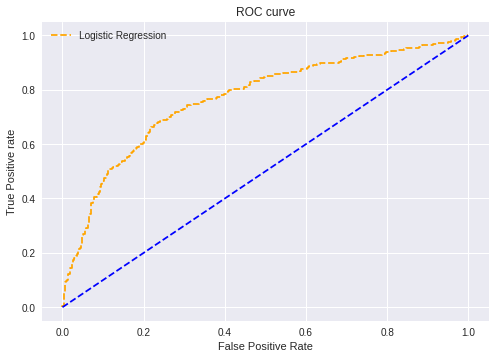

In [ ]:
accuracy_log_test = []
accuracy_log_train = []
classif_log_test=[]
classif_log_train=[]

for i in range(7):
  if i == 1:
    test_data = data_g[i]
    test_data_x = []
    test_data_y = []
    train_data_x = []
    train_data_y = []
    for j in range(7):
        if j!=i:      #creating training dataset
            for w in range(len(data_g[j])):
                train_data_x.append(data_g[j][w][:20])
                train_data_y.append(data_g[j][w][20])
        elif j == i:      #creating testing dataset
            for w in range(len(data_g[j])):
                test_data_x.append(data_g[j][w][:20])
                test_data_y.append(data_g[j][w][20])
                
    #convert into array
    test_data_xn = np.array(test_data_x)
    train_data_xn = np.array(train_data_x)
    test_data_yn = np.array(test_data_y)
    train_data_yn = np.array(train_data_y)
    
    #importing model from sklearn 
    clf = LogisticRegression(random_state = 0)
    clf.fit(train_data_xn, train_data_yn)
    
    #predict class
    test_pred_y_log = clf.predict(test_data_xn)
    train_pred_y_log = clf.predict(train_data_xn)
    
    pred_prob1 = clf.predict_proba(test_data_xn)

    from sklearn.metrics import roc_curve

    # roc curve for models
    fpr1, tpr1, thresh1 = roc_curve(test_data_yn, pred_prob1[:,1], pos_label=1)

    # roc curve for tpr = fpr 
    random_probs = [0 for i in range(len(test_data_yn))]
    p_fpr, p_tpr, _ = roc_curve(test_data_yn, random_probs, pos_label=1)
    
    from sklearn.metrics import roc_auc_score
    auc_score1 = roc_auc_score(test_data_yn, pred_prob1[:,1])
    print(auc_score1)

    # matplotlib
    import matplotlib.pyplot as plt
    plt.style.use('seaborn')

    # plot roc curves
    plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
    plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
    # title
    plt.title('ROC curve')
    # x label
    plt.xlabel('False Positive Rate')
    # y label
    plt.ylabel('True Positive rate')

    plt.legend(loc='best')
    #calculating and appending accuracies
    acc1_log = accuracy_score(test_data_yn, test_pred_y_log)
    accuracy_log_test.append(acc1_log)
    print("----------------------TESTING-----------------------")
    target_names = ['Covid Negative', 'Covid Positive']
    print(classification_report(test_data_yn, test_pred_y_log, target_names=target_names))
    print("------------------TRAINING-----------------")
    acc2_log = accuracy_score(train_data_yn, train_pred_y_log)
    accuracy_log_train.append(acc2_log)
    target_names = ['Covid Negative', 'Covid Positive']
    print(classification_report(train_data_yn, train_pred_y_log, target_names=target_names))


In [ ]:
#Creating the Confusion matrix
cm= confusion_matrix(test_data_yn, test_pred_y_log)
cm

array([[650,  65],
       [177, 130]])

In [ ]:
#printing accuracies 

print("Mean accuracy for test set = ", statistics.mean(accuracy_log_test))
print("Mean accuracy for train set = ", statistics.mean(accuracy_log_train))


Mean accuracy for test set =  0.7632093933463796
Mean accuracy for train set =  0.7631793700016322


# **NAIVE BAYES**

0.6784355709437143
----------------------TESTING-----------------------
                precision    recall  f1-score   support

Covid Negative       0.82      0.34      0.48       715
Covid Positive       0.35      0.83      0.49       307

      accuracy                           0.49      1022
     macro avg       0.59      0.58      0.49      1022
  weighted avg       0.68      0.49      0.48      1022



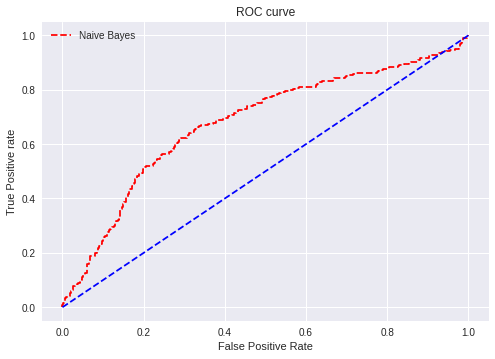

In [ ]:
accuracy_nb_test = []
accuracy_nb_train = []

for i in range(7):
  if i == 1:
    test_data = data_g[i]
    test_data_x = []
    test_data_y = []
    train_data_x = []
    train_data_y = []
    for j in range(7):
        if j!=i:      #creating training dataset
            for w in range(len(data_g[j])):
                train_data_x.append(data_g[j][w][:20])
                train_data_y.append(data_g[j][w][20])
        elif j == i:      #creating testing dataset
            for w in range(len(data_g[j])):
                test_data_x.append(data_g[j][w][:20])
                test_data_y.append(data_g[j][w][20])
       
    #convert into array         
    test_data_xn = np.array(test_data_x)
    train_data_xn = np.array(train_data_x)
    test_data_yn = np.array(test_data_y)
    train_data_yn = np.array(train_data_y)
    
    #importing model from sklearn
    clf = GaussianNB()
    clf.fit(train_data_xn, train_data_yn)

    
    #predict class
    test_pred_y_log = clf.predict(test_data_xn)
    train_pred_y_log = clf.predict(train_data_xn)
    
    pred_prob1 = clf.predict_proba(test_data_xn)

    from sklearn.metrics import roc_curve

    # roc curve for models
    fpr2, tpr2, thresh2 = roc_curve(test_data_yn, pred_prob1[:,1], pos_label=1)

    # roc curve for tpr = fpr 
    random_probs = [0 for i in range(len(test_data_yn))]
    p_fpr, p_tpr, _ = roc_curve(test_data_yn, random_probs, pos_label=1)
    
    from sklearn.metrics import roc_auc_score
    auc_score1 = roc_auc_score(test_data_yn, pred_prob1[:,1])
    print(auc_score1)

    # matplotlib
    import matplotlib.pyplot as plt
    plt.style.use('seaborn')

    # plot roc curves
    plt.plot(fpr2, tpr2, linestyle='--',color='red', label='Naive Bayes')
    plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
    # title
    plt.title('ROC curve')
    # x label
    plt.xlabel('False Positive Rate')
    # y label
    plt.ylabel('True Positive rate')

    plt.legend(loc='best')
    plt.savefig('ROC',dpi=300)
    #predict class
    test_pred_y_nb = clf.predict(test_data_xn)
    train_pred_y_nb = clf.predict(train_data_xn)

    #calculating and appending accuracies
    acc1_nb = accuracy_score(test_data_yn, test_pred_y_nb)
    accuracy_nb_test.append(acc1_nb)
    
    acc2_nb = accuracy_score(train_data_yn, train_pred_y_nb)
    accuracy_nb_train.append(acc2_nb)
    print("----------------------TESTING-----------------------")
    target_names = ['Covid Negative', 'Covid Positive']
    print(classification_report(test_data_yn, test_pred_y_log, target_names=target_names))

In [ ]:
#printing accuracies 

print("Mean accuracy for test set = ", statistics.mean(accuracy_nb_test))
print("Mean accuracy for train set = ", statistics.mean(accuracy_nb_train))

Mean accuracy for test set =  0.48532289628180036
Mean accuracy for train set =  0.510037538762853


# ***Fisher Linear Discriminant***

0.7572902667365209
----------------------TESTING-----------------------
                precision    recall  f1-score   support

Covid Negative       0.74      0.96      0.84       715
Covid Positive       0.71      0.21      0.33       307

      accuracy                           0.74      1022
     macro avg       0.72      0.59      0.58      1022
  weighted avg       0.73      0.74      0.68      1022



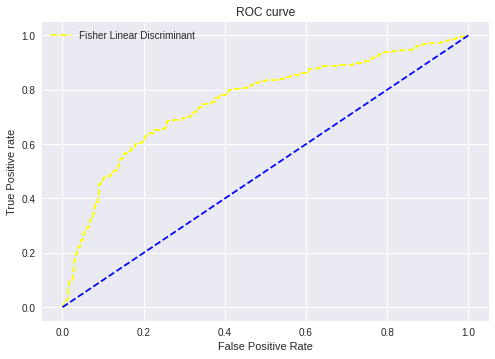

In [ ]:
accuracy_fl_test = []
accuracy_fl_train = []

for i in range(7):
  if i == 1:
    test_data = data_g[i]
    test_data_x = []
    test_data_y = []
    train_data_x = []
    train_data_y = []
    for j in range(7):
        if j!=i:      #creating training dataset
            for w in range(len(data_g[j])):
                train_data_x.append(data_g[j][w][:20])
                train_data_y.append(data_g[j][w][20])
        elif j == i:      #creating testing dataset
            for w in range(len(data_g[j])):
                test_data_x.append(data_g[j][w][:20])
                test_data_y.append(data_g[j][w][20])
                
    #convert into array
    test_data_xn = np.array(test_data_x)
    train_data_xn = np.array(train_data_x)
    test_data_yn = np.array(test_data_y)
    train_data_yn = np.array(train_data_y)
    
    #importing model from sklearn
    clf = LinearDiscriminantAnalysis()
    clf.fit(train_data_xn, train_data_yn)
    
    #predict class
    test_pred_y_log = clf.predict(test_data_xn)
    train_pred_y_log = clf.predict(train_data_xn)
    
    pred_prob1 = clf.predict_proba(test_data_xn)

    from sklearn.metrics import roc_curve

    # roc curve for models
    fpr3, tpr3, thresh3 = roc_curve(test_data_yn, pred_prob1[:,1], pos_label=1)

    # roc curve for tpr = fpr 
    random_probs = [0 for i in range(len(test_data_yn))]
    p_fpr, p_tpr, _ = roc_curve(test_data_yn, random_probs, pos_label=1)
    
    from sklearn.metrics import roc_auc_score
    auc_score1 = roc_auc_score(test_data_yn, pred_prob1[:,1])
    print(auc_score1)

    # matplotlib
    import matplotlib.pyplot as plt
    plt.style.use('seaborn')

    # plot roc curves
    plt.plot(fpr3, tpr3, linestyle='--',color='yellow', label='Fisher Linear Discriminant')
    plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
    # title
    plt.title('ROC curve')
    # x label
    plt.xlabel('False Positive Rate')
    # y label
    plt.ylabel('True Positive rate')

    plt.legend(loc='best')
    plt.savefig('ROC',dpi=300)
    #predict class
    test_pred_y_fl = clf.predict(test_data_xn)
    train_pred_y_fl = clf.predict(train_data_xn)
    
    #calculating and appending accuracies
    acc1_fl = accuracy_score(test_data_yn, test_pred_y_fl)
    accuracy_fl_test.append(acc1_fl)
    
    acc2_fl = accuracy_score(train_data_yn, train_pred_y_fl)
    accuracy_fl_train.append(acc2_fl)
    print("----------------------TESTING-----------------------")
    target_names = ['Covid Negative', 'Covid Positive']
    print(classification_report(test_data_yn, test_pred_y_log, target_names=target_names))

In [ ]:
#printing accuracies 

print("Mean accuracy for test set = ", statistics.mean(accuracy_fl_test))
print("Mean accuracy for train set = ", statistics.mean(accuracy_fl_train))

Mean accuracy for test set =  0.7367906066536204
Mean accuracy for train set =  0.7259670311734944


# **KNN**

In [ ]:
df

,Eosinophils_(normalized_–_counts/µL),Monocytes_(normalized_–_counts/µL),Platelets_(normalized_–_counts(×10^3)/µL),Hematocrit_(normalized_–_percentage),Erythrocytes_(normalized_–_counts(×10^6)/µL),Lymphocytes_(normalized_–_counts/µL),Neutrophils_(normalized_–_counts/µL),Basophils_(normalized_–_counts/µL),Serum_Albumin_(normalized_–_g/dL),Mature_Neutrophils_(normalized_–_counts/µL),Total_Bilirubin_(normalized_–_mg/dL),Serum_Ca_(normalized_–_mmol/L),Lactate_Dehydrogenase_(normalized_–_U/L),Serum_Ferritin_(normalized_–_ng/mL),Serum_Phosphorus_(normalized_–_mg/dL),Gamma-GT_(normalized_–_U/L),Serum_Magnesium_(normalized_–_mEq/L),pO2_–_Arterial_(normalized_–_mm_Hg),AST_(normalized_–_U/L),ALT_(normalized_–_U/L),SARS-CoV-2
3449,-2.444444,0.433333,-2.120000,-6.640000,-6.800000,-2.9020,2.150476,-1.64,NaN,NaN,NaN,-2.941176,NaN,NaN,-2.0,NaN,0.4,-1.52,NaN,NaN,1
6189,1.928889,2.033333,-0.653333,0.181818,0.657143,0.1380,4.825397,0.56,NaN,NaN,NaN,NaN,0.666667,NaN,NaN,NaN,-0.4,NaN,NaN,-1.400000,0
2343,0.693333,-1.806667,-0.786667,0.080000,0.000000,-0.5940,-0.744127,-1.28,1.058824,NaN,-1.272727,NaN,NaN,-1.475591,NaN,-1.741935,NaN,NaN,NaN,-2.480000,0
2727,1.191111,1.320000,-0.866667,-0.436364,-0.171429,1.8200,-1.174603,-0.32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.926829,1
3394,-2.097778,-1.426667,-1.866667,-2.360000,-2.327273,-0.0580,0.356190,-1.08,NaN,NaN,NaN,NaN,-0.278481,NaN,NaN,NaN,NaN,NaN,NaN,-1.200000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5948,-2.444444,-0.213333,-1.653333,-1.527273,-1.142857,-3.2320,NaN,-2.00,NaN,2.086349,-0.909091,-0.352941,20.444444,20.507463,-0.6,5.471698,2.0,29.20,NaN,1.700000,1
4424,-1.720000,3.950000,-0.066667,-2.571429,-0.666667,-1.7296,6.130968,-1.30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,-1.024390,0
3433,-0.480000,1.946667,1.640000,-0.181818,0.228571,0.8880,-0.631746,0.36,NaN,NaN,NaN,-0.117647,3.422222,3.057569,NaN,NaN,1.0,NaN,NaN,NaN,1
2572,-0.844444,0.386667,-0.773333,-0.800000,0.000000,-0.2760,-0.516190,-1.48,NaN,NaN,NaN,NaN,0.666667,NaN,NaN,NaN,NaN,NaN,NaN,0.700000,0


In [ ]:
y=df[['SARS-CoV-2']] 
y

,SARS-CoV-2
3449,1
6189,0
2343,0
2727,1
3394,0
...,...
5948,1
4424,0
3433,1
2572,0


In [ ]:
x=df.drop(['SARS-CoV-2'], axis = 1)
x

,Eosinophils_(normalized_–_counts/µL),Monocytes_(normalized_–_counts/µL),Platelets_(normalized_–_counts(×10^3)/µL),Hematocrit_(normalized_–_percentage),Erythrocytes_(normalized_–_counts(×10^6)/µL),Lymphocytes_(normalized_–_counts/µL),Neutrophils_(normalized_–_counts/µL),Basophils_(normalized_–_counts/µL),Serum_Albumin_(normalized_–_g/dL),Mature_Neutrophils_(normalized_–_counts/µL),Total_Bilirubin_(normalized_–_mg/dL),Serum_Ca_(normalized_–_mmol/L),Lactate_Dehydrogenase_(normalized_–_U/L),Serum_Ferritin_(normalized_–_ng/mL),Serum_Phosphorus_(normalized_–_mg/dL),Gamma-GT_(normalized_–_U/L),Serum_Magnesium_(normalized_–_mEq/L),pO2_–_Arterial_(normalized_–_mm_Hg),AST_(normalized_–_U/L),ALT_(normalized_–_U/L)
3449,-2.444444,0.433333,-2.120000,-6.640000,-6.800000,-2.9020,2.150476,-1.64,NaN,NaN,NaN,-2.941176,NaN,NaN,-2.0,NaN,0.4,-1.52,NaN,NaN
6189,1.928889,2.033333,-0.653333,0.181818,0.657143,0.1380,4.825397,0.56,NaN,NaN,NaN,NaN,0.666667,NaN,NaN,NaN,-0.4,NaN,NaN,-1.400000
2343,0.693333,-1.806667,-0.786667,0.080000,0.000000,-0.5940,-0.744127,-1.28,1.058824,NaN,-1.272727,NaN,NaN,-1.475591,NaN,-1.741935,NaN,NaN,NaN,-2.480000
2727,1.191111,1.320000,-0.866667,-0.436364,-0.171429,1.8200,-1.174603,-0.32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.926829
3394,-2.097778,-1.426667,-1.866667,-2.360000,-2.327273,-0.0580,0.356190,-1.08,NaN,NaN,NaN,NaN,-0.278481,NaN,NaN,NaN,NaN,NaN,NaN,-1.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5948,-2.444444,-0.213333,-1.653333,-1.527273,-1.142857,-3.2320,NaN,-2.00,NaN,2.086349,-0.909091,-0.352941,20.444444,20.507463,-0.6,5.471698,2.0,29.20,NaN,1.700000
4424,-1.720000,3.950000,-0.066667,-2.571429,-0.666667,-1.7296,6.130968,-1.30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,-1.024390
3433,-0.480000,1.946667,1.640000,-0.181818,0.228571,0.8880,-0.631746,0.36,NaN,NaN,NaN,-0.117647,3.422222,3.057569,NaN,NaN,1.0,NaN,NaN,NaN
2572,-0.844444,0.386667,-0.773333,-0.800000,0.000000,-0.2760,-0.516190,-1.48,NaN,NaN,NaN,NaN,0.666667,NaN,NaN,NaN,NaN,NaN,NaN,0.700000


In [ ]:
imp = SimpleImputer(missing_values=np.nan, strategy='median')
imp.fit(x)
#X_2 = X
SimpleImputer()
X = imp.transform(x)
X

array([[-2.44444444,  0.43333333, -2.12      , ..., -1.52      ,
         0.375     , -0.08      ],
       [ 1.92888889,  2.03333333, -0.65333333, ...,  2.4       ,
         0.375     , -1.4       ],
       [ 0.69333333, -1.80666667, -0.78666667, ...,  2.4       ,
         0.375     , -2.48      ],
       ...,
       [-0.48      ,  1.94666667,  1.64      , ...,  2.4       ,
         0.375     , -0.08      ],
       [-0.84444444,  0.38666667, -0.77333333, ...,  2.4       ,
         0.375     ,  0.7       ],
       [-2.08      , -0.65333333,  0.29333333, ...,  2.4       ,
         0.375     ,  3.6       ]])

In [ ]:
x_train, x_test, y_train, y_test= train_test_split(X, y, test_size= 0.1, random_state=0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.7850613124171454


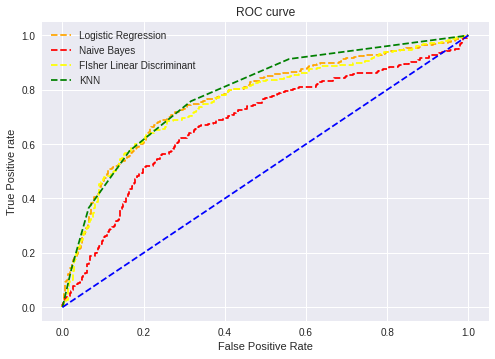

In [ ]:
#Fitting K-NN classifier to the training set
classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
classifier.fit(x_train, y_train)
#importing model from sklearn 
    
    #predict class
test_pred_y_log = classifier.predict(x_test)
train_pred_y_log = classifier.predict(x_train)
    
pred_prob1 = classifier.predict_proba(x_test)

from sklearn.metrics import roc_curve

    # roc curve for models
fpr4, tpr4, thresh4 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)

    # roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
    
from sklearn.metrics import roc_auc_score
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
print(auc_score1)

    # matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

    # plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='red', label='Naive Bayes')
plt.plot(fpr3, tpr3, linestyle='--',color='yellow', label='FIsher Linear Discriminant')
plt.plot(fpr4, tpr4, linestyle='--',color='green', label='KNN')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
    # title
plt.title('ROC curve')
    # x label
plt.xlabel('False Positive Rate')
    # y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

In [ ]:
#Predicting the test set result  
y_pred= classifier.predict(x_test) 
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,

In [ ]:
#Creating the Confusion matrix
cm= confusion_matrix(y_test, y_pred)

In [ ]:
#finding accuracy
accuracy = accuracy_score(y_test, y_pred)

In [ ]:
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("The Confusion Matrix is:\n ",cm)
target_names = ['Covid Negative', 'Covid Positive']
print(classification_report(y_test, y_pred, target_names=target_names))

Accuracy: 75.52%
The Confusion Matrix is:
  [[414  82]
 [ 93 126]]
                precision    recall  f1-score   support

Covid Negative       0.82      0.83      0.83       496
Covid Positive       0.61      0.58      0.59       219

      accuracy                           0.76       715
     macro avg       0.71      0.71      0.71       715
  weighted avg       0.75      0.76      0.75       715

